Black friday dataset EDA ,cleaning,preapareing the data for model training

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##problem  statement
A retail company "xyz private ltd" wants to understand the customer purchase behaviour against various products of different categories.they have shared purchase summary of various customers for selected high volume products from last month .the data set also contains customer demographics(age,gender,marital status,city_type,current city) and total purchase amount from last month.
now ,they wants to build a model to predict the purchase amount of customer against the products which will  help them to create personalized offer for customers in different product

In [4]:
df_train=pd.read_csv('train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df_test=pd.read_csv('test.csv')

mergeing both train and test data

In [7]:
df_train.append(df_test)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [8]:
df_train.info

<bound method DataFrame.info of         User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0     

In [9]:
df=df_train.append(df_test)

In [10]:
df.info

<bound method DataFrame.info of         User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
233594  1006036  P00118942      F  26-35          15             B   
233595  1006036  P00254642      F  26-35          15             B   
233596  1006036  P00031842      F  26-35          15             B   
233597  1006037  P00124742      F  46-50           1             C   
233598  1006039  P00316642      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0     

In [11]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [12]:
df.drop(['User_ID'],axis=1,inplace=True)

In [13]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [14]:
pd.get_dummies(df['Gender'])

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,1,0


In [15]:
df['Gender']=df['Gender'].map({'F':0,'m':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0.0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0.0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0.0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0.0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,NaN,55+,16,C,4+,0,8,NaN,NaN,7969.0


Handing categorical feature gender

In [16]:
##Handing categorical feature age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [17]:
pd.get_dummies(df['Age'],drop_first=True)

,18-25,26-35,36-45,46-50,51-55,55+
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
233594,0,1,0,0,0,0
233595,0,1,0,0,0,0
233596,0,1,0,0,0,0
233597,0,0,0,1,0,0


In [18]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [19]:

from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Age']= label_encoder.fit_transform(df['Age'])

df['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1])

In [20]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0.0,0,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0.0,0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0.0,0,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0.0,0,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,NaN,6,16,C,4+,0,8,NaN,NaN,7969.0


In [21]:
pd.get_dummies(df['City_Category'],drop_first=True)

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,0,1


fixing the cities

In [22]:
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [23]:
df=pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0.0,0,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0.0,0,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0.0,0,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0.0,0,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,NaN,6,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [25]:
df.drop('City_Category',axis=1)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0.0,0,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0.0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0.0,0,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0.0,0,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,NaN,6,16,4+,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0.0,2,15,4+,1,8,NaN,NaN,NaN,1,0
233595,P00254642,0.0,2,15,4+,1,5,8.0,NaN,NaN,1,0
233596,P00031842,0.0,2,15,4+,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0.0,4,1,4+,0,10,16.0,NaN,NaN,0,1


## missing values

In [26]:
df.isnull().sum()

Product_ID                         0
Gender                        590031
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

replacing missing values

In [27]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [28]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

replacing missing values by mode

In [29]:
df['Product_Category_2'].mode()[0]

8.0

In [30]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2']).mode()[0]

In [31]:
df['Product_Category_2'].isnull().sum()

0

In [32]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [33]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [34]:
df['Product_Category_3']=df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2']).mode()[0]

In [35]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0.0,0,10,A,2,0,3,8.0,8.0,8370.0,0,0
1,P00248942,0.0,0,10,A,2,0,1,8.0,8.0,15200.0,0,0
2,P00087842,0.0,0,10,A,2,0,12,8.0,8.0,1422.0,0,0
3,P00085442,0.0,0,10,A,2,0,12,8.0,8.0,1057.0,0,0
4,P00285442,NaN,6,16,C,4+,0,8,8.0,8.0,7969.0,0,1


In [36]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [37]:
df['Stay_In_Current_City_Years'].str.replace('+','')

<ipython-input-37-db4a9c82d1b2>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years'].str.replace('+','')


0         2
1         2
2         2
3         2
4         4
         ..
233594    4
233595    4
233596    4
233597    4
233598    4
Name: Stay_In_Current_City_Years, Length: 783667, dtype: object

##convert object into integers

In [38]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [39]:
df.info

<bound method DataFrame.info of        Product_ID  Gender  Age  Occupation City_Category  \
0       P00069042     0.0    0          10             A   
1       P00248942     0.0    0          10             A   
2       P00087842     0.0    0          10             A   
3       P00085442     0.0    0          10             A   
4       P00285442     NaN    6          16             C   
...           ...     ...  ...         ...           ...   
233594  P00118942     0.0    2          15             B   
233595  P00254642     0.0    2          15             B   
233596  P00031842     0.0    2          15             B   
233597  P00124742     0.0    4           1             C   
233598  P00316642     0.0    4           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0                   3   
1                               2               0                   1   
2                           

In [52]:
## visualisation

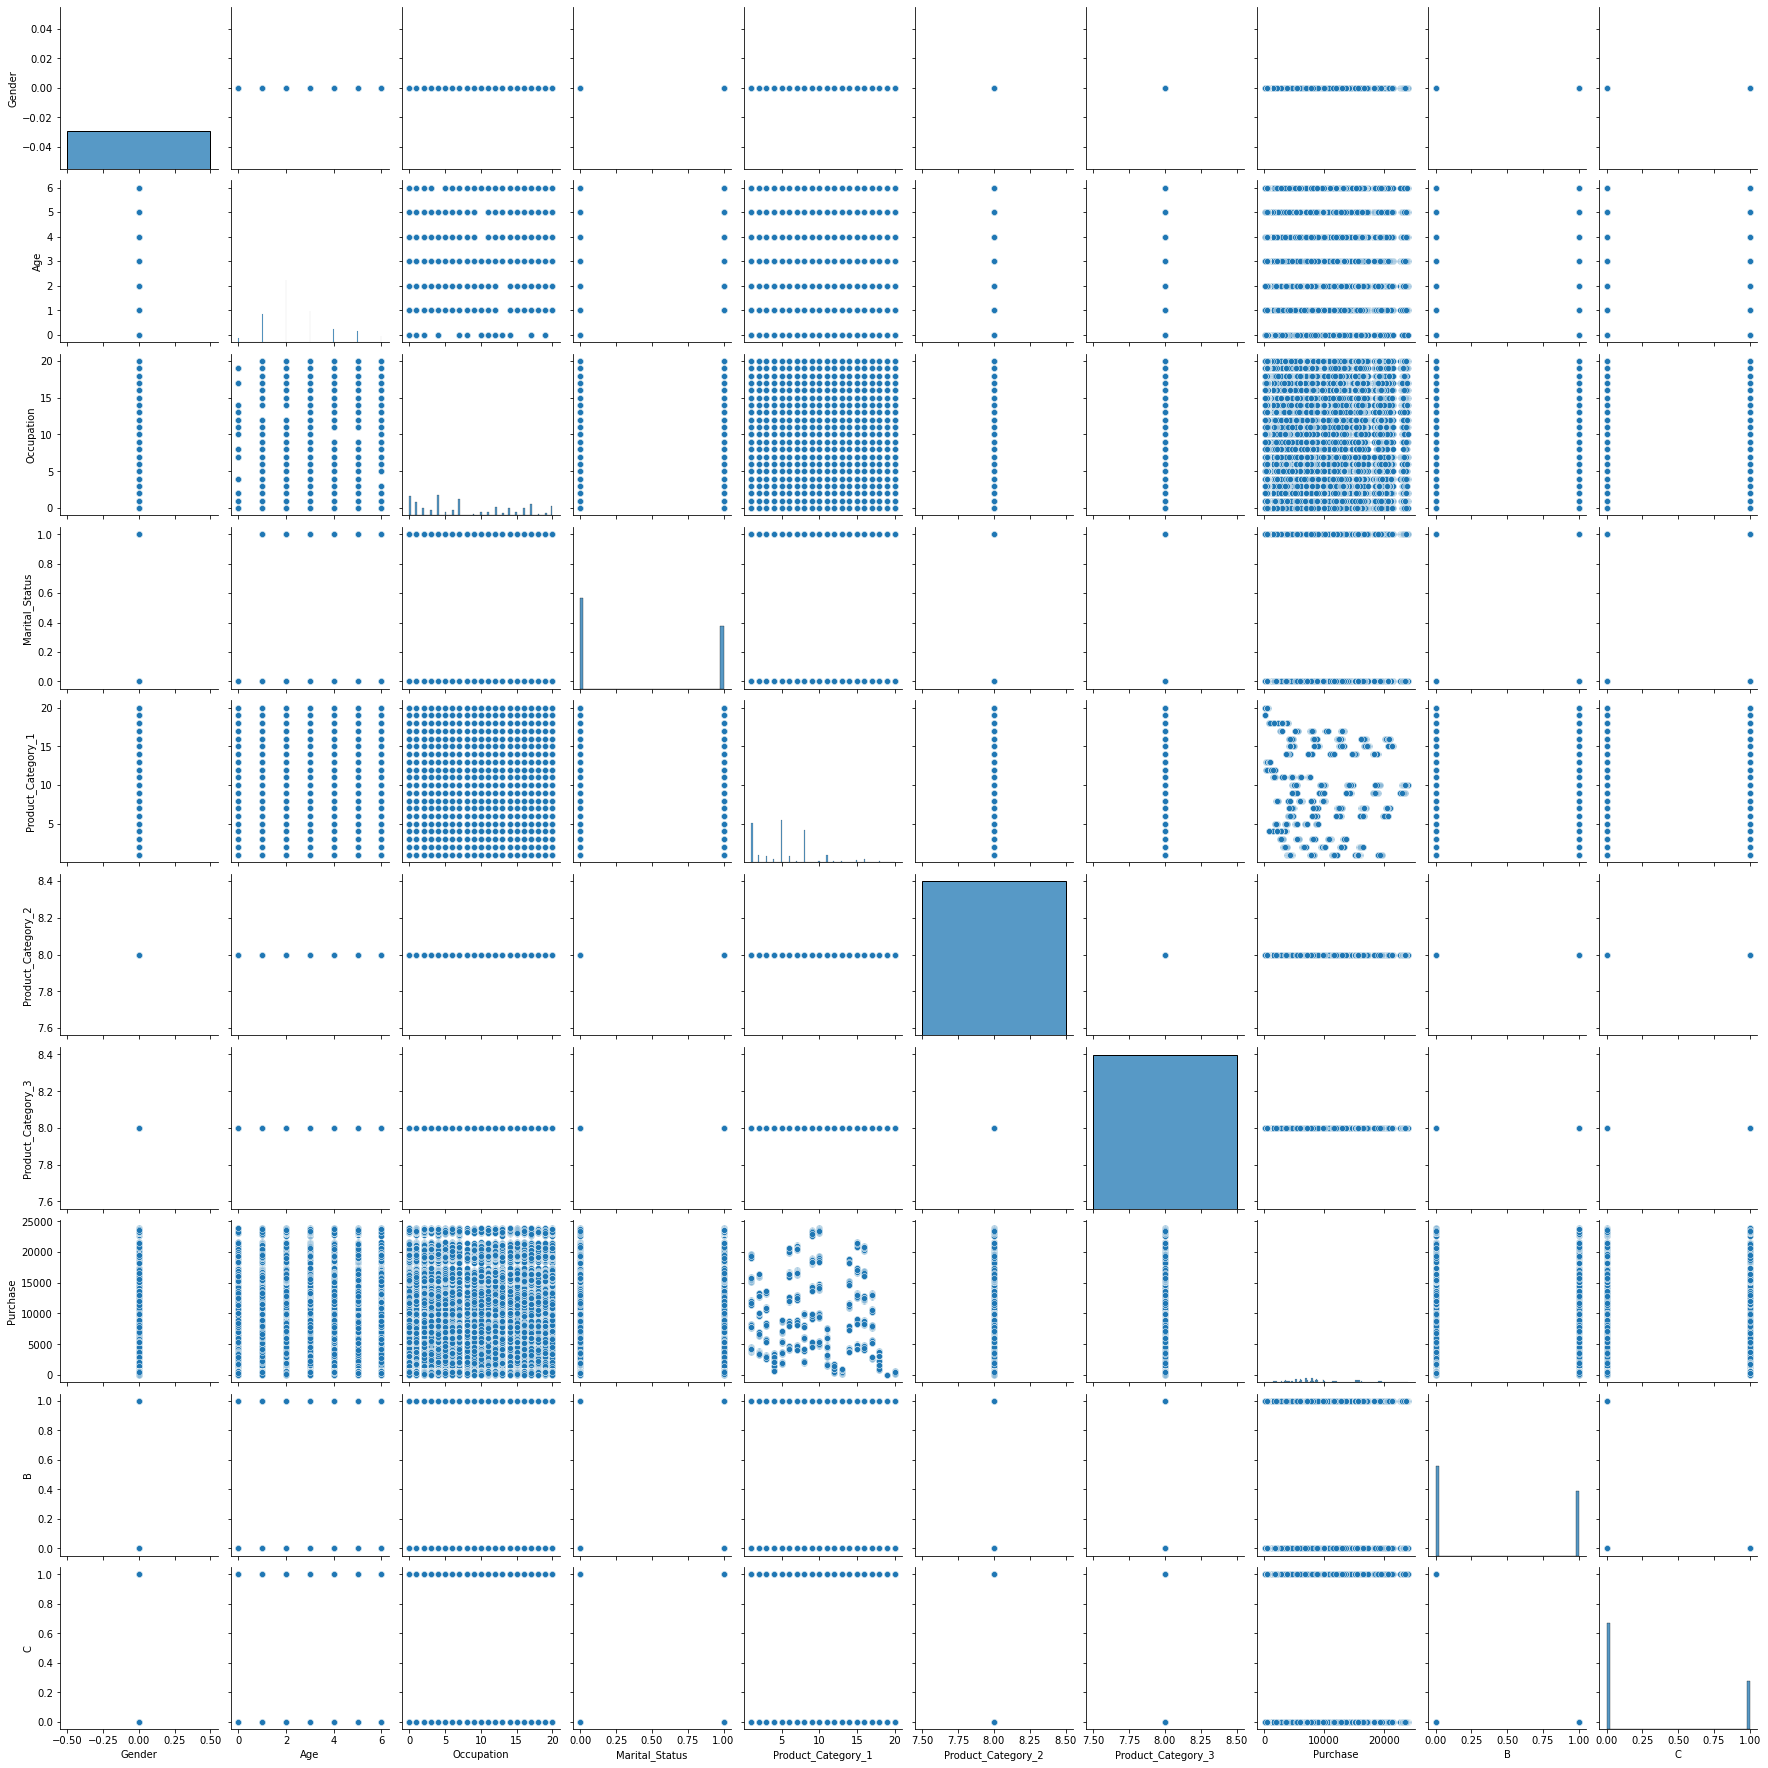

In [45]:
sns.pairplot(df)

In [47]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0.0,0,10,A,2,0,3,8.0,8.0,8370.0,0,0
1,P00248942,0.0,0,10,A,2,0,1,8.0,8.0,15200.0,0,0
2,P00087842,0.0,0,10,A,2,0,12,8.0,8.0,1422.0,0,0
3,P00085442,0.0,0,10,A,2,0,12,8.0,8.0,1057.0,0,0
4,P00285442,NaN,6,16,C,4+,0,8,8.0,8.0,7969.0,0,1


In [49]:
df_test=df['Purchase'].isnull()

In [55]:
df[df['Purchase'].isnull()]

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,NaN,4,7,B,2,1,1,8.0,8.0,NaN,1,0
1,P00113442,NaN,2,17,C,0,0,3,8.0,8.0,NaN,0,1
2,P00288442,0.0,3,1,B,4+,1,5,8.0,8.0,NaN,1,0
3,P00145342,0.0,3,1,B,4+,1,4,8.0,8.0,NaN,1,0
4,P00053842,0.0,2,1,C,1,0,4,8.0,8.0,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0.0,2,15,B,4+,1,8,8.0,8.0,NaN,1,0
233595,P00254642,0.0,2,15,B,4+,1,5,8.0,8.0,NaN,1,0
233596,P00031842,0.0,2,15,B,4+,1,1,8.0,8.0,NaN,1,0
233597,P00124742,0.0,4,1,C,4+,0,10,8.0,8.0,NaN,0,1
